<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
!pip uninstall pycomp -y

In [5]:
 !pip install "../../../dist/pycomp-0.1.0-py3-none-any.whl"

Processing /home/paninit/workspaces/pycomp/dist/pycomp-0.1.0-py3-none-any.whl


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from pycomp.viz.formatador import *
import pandas as pd
import os
import numpy as np

# AnnotateBars class (referência na classe)
from dataclasses import dataclass
from typing import *
import matplotlib

In [7]:
# Definindo funções úteis para plotagem dos rótulos no gráfico
def make_autopct(values):
    """
    Função para configuração de rótulos em gráficos de rosca

    Parâmetros
    ----------
    :param values: valores atrelados ao rótulo [type: np.array]

    Retorno
    -------
    :return my_autopct: string formatada para plotagem dos rótulos
    """

    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))

        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)

    return my_autopct

In [8]:
# Definindo variáveis do projeto
DATA_PATH = '../../ml/titanic_data/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# Lendo base de treino e verificando conteúdo
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
print(f'Dimensões da base de treino: {df.shape}')
df.head()

Dimensões da base de treino: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
def save_fig(fig, output_path, img_name, tight_layout=True, dpi=300):
        """
        Método responsável por salvar imagens geradas pelo matplotlib/seaborn

        Parâmetros
        ----------
        :param fig: figura criada pelo matplotlib para a plotagem gráfica [type: plt.figure]
        :param output_file: caminho final a ser salvo (+ nome do arquivo em formato png) [type: string]
        :param tight_layout: flag que define o acerto da imagem [type: bool, default=True]
        :param dpi: resolução da imagem a ser salva [type: int, default=300]

        Retorno
        -------
        Este método não retorna nenhum parâmetro além do salvamento da imagem em diretório especificado

        Aplicação
        ---------
        fig, ax = plt.subplots()
        save_fig(fig, output_file='imagem.png')
        """

        # Verificando se diretório existe
        if not os.path.isdir(output_path):
            print(f'Diretório {output_path} inexistente. Criando diretório no local especificado')
            try:
                os.makedirs(output_path)
            except Exception as e:
                print(f'Erro ao tentar criar o diretório {output_path}. Exception lançada: {e}')
                return
        
        # Acertando layout da imagem
        if tight_layout:
            fig.tight_layout()
        
        try:
            output_file = os.path.join(output_path, img_name)
            fig.savefig(output_file, dpi=300)
        except Exception as e:
            print(f'Erro ao salvar imagem. Exception lançada: {e}')
            return

def plot_donut_chart(df, col, figsize=(8, 8), circle_radius=0.8, **kwargs):
    """
    Função responsável por plotar um gráfico de rosca customizado para uma determinada coluna da base
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col: nome da coluna a ser analisada [type: string]
    :param figsize: dimensões da figura de plotagem [type: tuple, default=(8, 8)]
    :param circle_radius: raio do círculo central do gráfico [type: float, default=0.8]
    :param **kwargs: parâmetros adicionais da função
        :arg label_names: lista com labels personalizados para os rótulos [type: list, default=value_counts().index]
        :arg flag_ruido: índice de filtro para eliminar as n últimas entradas [type: float, default=None]
        :arg colors: lista de cores para aplicação na plotagem [type: list]
        :arg text: texto central do gráfico de rosca [type: string, default=f'Total: \n{sum(values)}']
        :arg title: título do gráfico [type: string, default=f'Gráfico de Rosca para a Variável ${col}$']
        :arg autotexts_size: dimensão do rótulo do valor numérico do gráfico [type: int, default=14]
        :arg autotexts_color: cor do rótulo do valor numérico do gráfico [type: int, default='black]
        :arg texts_size: dimensão do rótulo do label [type: int, default=14]
        :arg texts_color: cor do rótulo do label [type: int, default='black']
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_donutchart.png']
    
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além da plotagem customizada do gráfico de rosca

    Aplicação
    ---------
    plot_donut_chart(df=df, col='categorical_column', label_names=['Classe 1', 'Classe 2'])
    """
    


    # Retorno dos valores e definição da figura
    try:
        values = df[col].value_counts().values
    except KeyError as e:
        cat_cols = [col for col, dtype in df.dtypes.items() if dtype == 'object']
        print(f'Coluna "{col}" não presente na base. Colunas categóricas disponíveis: {cat_cols}')
        return
    
    # Rótulos de medida para a plotagem
    if 'label_names' in kwargs:
        label_names = kwargs['label_names']
        if type(label_names) is dict:
            try:
                label_names = df[col].map(label_names).value_counts().index
            except Exception as e:
                print(f'Erro ao mapear o dicionário label_names na Series da coluna. Exception: {e}')
                label_names = df[col].value_counts().index
    else:
        label_names = df[col].value_counts().index
    
    # Verificando parâmetro de supressão de alguma categoria da análise
    if 'flag_ruido' in kwargs and kwargs['flag_ruido'] > 0:
        flag_ruido = kwargs['flag_ruido']
        values = values[:-flag_ruido]
        label_names = label_names[:-flag_ruido]
    
    # Cores para a plotagem
    color_list = ['darkslateblue', 'crimson', 'lightseagreen', 'lightskyblue', 'lightcoral', 'silver']
    colors = kwargs['colors'] if 'colors' in kwargs else color_list[:len(label_names)]

    # Plotando gráfico de rosca
    center_circle = plt.Circle((0, 0), circle_radius, color='white')
    fig, ax = plt.subplots(figsize=figsize)
    wedges, texts, autotexts = ax.pie(values, labels=label_names, colors=colors, startangle=90, autopct=make_autopct(values))
    ax.add_artist(center_circle)

    # Configurando argumentos do texto central
    text = kwargs['text'] if 'text' in kwargs else f'Total: \n{sum(values)}'
    text_kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **text_kwargs)
    
    # Definindo título
    title = kwargs['title'] if 'title' in kwargs else f'Gráfico de Rosca para a Variável ${col}$'
    ax.set_title(title, size=16, color='dimgrey')

    # Parâmetros de customização do gráfico gerado
    autotexts_size = kwargs['autotexts_size'] if 'autotexts_size' in kwargs else 14
    autotexts_color = kwargs['autotexts_color'] if 'autotexts_color' in kwargs else 'black'
    texts_size = kwargs['texts_size'] if 'texts_size' in kwargs else 14
    texts_color = kwargs['texts_color'] if 'texts_stexts_colorize' in kwargs else 'black'

    # Customizando rótulos
    plt.setp(autotexts, size=autotexts_size, color=autotexts_color)
    plt.setp(texts, size=texts_size, color=texts_color)

    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):

        # Retornando diretório e nome da imagem
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'{col}_donutchart.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)

def plot_pie_chart(df, col, figsize=(8, 8), **kwargs):
    """
    Função responsável por plotar um gráfico de pizza customizado para uma determinada coluna da base
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col: nome da coluna a ser analisada [type: string]
    :param figsize: dimensões da figura de plotagem [type: tuple, default=(8, 8)]
    :param **kwargs: parâmetros adicionais da função
        :arg label_names: lista com labels personalizados para os rótulos [type: list, default=value_counts().index]
        :arg flag_ruido: índice de filtro para eliminar as n últimas entradas [type: float, default=None]
        :arg colors: lista de cores para aplicação na plotagem [type: list]
        :arg title: título do gráfico [type: string, default=f'Gráfico de Rosca para a Variável ${col}$']
        :arg autotexts_size: dimensão do rótulo do valor numérico do gráfico [type: int, default=14]
        :arg autotexts_color: cor do rótulo do valor numérico do gráfico [type: int, default='white']
        :arg texts_size: dimensão do rótulo do label [type: int, default=14]
        :arg texts_color: cor do rótulo do label [type: int, default='black']
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_donutchart.png']
    
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além da plotagem customizada do gráfico de pizaa

    Aplicação
    ---------
    plot_pie_chart(df=df, col='categorical_column', label_names=['Classe 1', 'Classe 2'])
    """
    
    # Retorno dos valores e definição da figura
    try:
        values = df[col].value_counts().values
    except KeyError as e:
        cat_cols = [col for col, dtype in df.dtypes.items() if dtype == 'object']
        print(f'Coluna "{col}" não presente na base. Colunas categóricas disponíveis: {cat_cols}')
        return
    
    # Rótulos de medida para a plotagem
    if 'label_names' in kwargs:
        label_names = kwargs['label_names']
        if type(label_names) is dict:
            try:
                label_names = df[col].map(label_names).value_counts().index
            except Exception as e:
                print(f'Erro ao mapear o dicionário label_names na Series da coluna. Exception: {e}')
                label_names = df[col].value_counts().index
    else:
        label_names = df[col].value_counts().index
    
    # Verificando parâmetro de supressão de alguma categoria da análise
    if 'flag_ruido' in kwargs and kwargs['flag_ruido'] > 0:
        flag_ruido = kwargs['flag_ruido']
        values = values[:-flag_ruido]
        label_names = label_names[:-flag_ruido]
    
    # Cores para a plotagem
    color_list = ['darkslateblue', 'crimson', 'lightseagreen', 'lightskyblue', 'lightcoral', 'silver']
    colors = kwargs['colors'] if 'colors' in kwargs else color_list[:len(label_names)]

    # Parâmetros de plotagem do gráfico de pizza
    explode = kwargs['explode'] if 'explode' in kwargs else (0,) * len(label_names)
    shadow = kwargs['shadow'] if 'shadow' in kwargs else False

    # Plotando gráfico de pizza
    fig, ax = plt.subplots(figsize=figsize)
    wedges, texts, autotexts = ax.pie(values, labels=label_names, colors=colors, autopct=make_autopct(values), 
                                      startangle=90, explode=explode, shadow=shadow)
    
    # Definindo título
    title = kwargs['title'] if 'title' in kwargs else f'Gráfico de Rosca para a Variável ${col}$'
    ax.set_title(title, size=16, color='dimgrey')

    # Parâmetros de customização do gráfico gerado
    autotexts_size = kwargs['autotexts_size'] if 'autotexts_size' in kwargs else 14
    autotexts_color = kwargs['autotexts_color'] if 'autotexts_color' in kwargs else 'white'
    texts_size = kwargs['texts_size'] if 'texts_size' in kwargs else 14
    texts_color = kwargs['texts_color'] if 'texts_stexts_colorize' in kwargs else 'black'

    # Customizando rótulos
    plt.setp(autotexts, size=autotexts_size, color=autotexts_color)
    plt.setp(texts, size=texts_size, color=texts_color)

    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):

        # Retornando diretório e nome da imagem
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'{col}_piechart.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)

def plot_double_donut_chart(df, col1, col2, figsize=(8, 8), circle_radius=0.55, **kwargs):
    """
    Função responsável por plotar um gráfico de rosca customizado para uma determinada coluna da base
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col1: nome da primeira coluna a ser analisada (outer) [type: string]
    :param col1: nome da segunda coluna a ser analisada (inner) [type: string]
    :param figsize: dimensões da figura de plotagem [type: tuple, default=(8, 8)]
    :param circle_radius: raio do círculo central do gráfico [type: float, default=0.55]
    :param **kwargs: parâmetros adicionais da função
        :arg label_names_col1: lista com rótulos da primeira coluna [type: list, default=value_counts().index]
        :arg label_names_col2: lista com rótulos da segunda coluna [type: list, default=value_counts().index]
        :arg flag_ruido: índice de filtro para eliminar as n últimas entradas [type: float, default=None]
        :arg colors: lista de cores para aplicação na plotagem [type: list]
        :arg text: texto central do gráfico de rosca [type: string, default=f'Total: \n{sum(values)}']
        :arg title: título do gráfico [type: string, default=f'Gráfico de Rosca para a Variável ${col}$']
        :arg autotexts_size: dimensão do rótulo do valor numérico do gráfico [type: int, default=14]
        :arg autotexts_color: cor do rótulo do valor numérico do gráfico [type: int, default='black]
        :arg texts_size: dimensão do rótulo do label [type: int, default=14]
        :arg texts_color: cor do rótulo do label [type: int, default='black']
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_donutchart.png']
    
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além da plotagem customizada do gráfico duplo de rosca

    Aplicação
    ---------
    plot_donut_chart(df=df, col1='categorical_column', col2='categorical_column2)
    """
    
    # Retorno dos valores e definição da figura
    try:
        first_layer_donut = df.groupby(col1).count().iloc[:, 0]
        first_layer_values = first_layer_donut.values
        second_layer_donut = df.groupby([col1, col2]).count().iloc[:, 0]
        second_layer_values = second_layer_donut.values
        col2_index = df.groupby(col2).count().iloc[:, 0].index
    except KeyError as e:
        cat_cols = [col for col, dtype in df.dtypes.items() if dtype == 'object']
        print(f'Coluna "{col}" não presente na base. Colunas categóricas disponíveis: {cat_cols}')
        return
    
    # Criando DataFrame com dados da segunda camada
    second_layer_df = pd.DataFrame(second_layer_donut.index.values)
    second_layer_df['first_index'] = second_layer_df[0].apply(lambda x: x[0])
    second_layer_df['second_index'] = second_layer_df[0].apply(lambda x: x[1])
    second_layer_df['values'] = second_layer_donut.values

    # Retornando labels
    if 'label_names_col1' in kwargs:
        label_names_col1 = kwargs['label_names_col1']
        if type(kwargs['label_names_col1']) is dict:
            label_names_col1 = first_layer_donut.index.map(kwargs['label_names_col1'])
    else:
        label_names_col1 = first_layer_donut.index

    if 'label_names_col2' in kwargs:
        label_names_col2 = kwargs['label_names_col2']
        if type(kwargs['label_names_col2']) is dict:
            label_names_col2 = second_layer_df['second_index'].map(kwargs['label_names_col2'])
    else:
        label_names_col2 = second_layer_df['second_index']


    """label_names_col1 = kwargs['label_names_col1'] if 'label_names_col1' in kwargs else first_layer_donut.index
    label_names_col2 = kwargs['label_names_col2'] if 'label_names_col2' in kwargs else second_layer_df['second_index']"""
    
    # Verificando parâmetro de supressão de alguma categoria da análise
    if 'flag_ruido' in kwargs and kwargs['flag_ruido'] > 0:
        flag_ruido = kwargs['flag_ruido']
        values = values[:-flag_ruido]
        label_names = label_names[:-flag_ruido]
    
    # Cores para a plotagem
    color_list = ['darkslateblue', 'crimson', 'lightseagreen', 'silver', 'lightskyblue', 'lightcoral']
    colors1 = kwargs['colors1'] if 'colors1' in kwargs else color_list[:len(label_names_col1)]
    colors2 = kwargs['colors2'] if 'colors2' in kwargs else color_list[-len(col2_index):]

    # Plotando gráfico de rosca
    center_circle = plt.Circle((0, 0), circle_radius, color='white')
    fig, ax = plt.subplots(figsize=figsize)
    wedges1, texts1, autotexts1 = ax.pie(first_layer_values, colors=colors1, 
                                         startangle=90, autopct=make_autopct(first_layer_values),
                                         pctdistance=1.20)
    wedges2, texts2, autotexts2 = ax.pie(second_layer_values, radius=0.75, colors=colors2,
                                         startangle=90, autopct=make_autopct(second_layer_values),
                                         pctdistance=0.55)
    ax.add_artist(center_circle)

    # Configurando argumentos do texto central
    text = kwargs['text'] if 'text' in kwargs else ''
    text_kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **text_kwargs)
    
    # Definindo título
    title = kwargs['title'] if 'title' in kwargs else f'Gráfico Duplo de Rosca para ${col1}$ e ${col2}$'
    ax.set_title(title, size=16, color='dimgrey')

    # Parâmetros de customização do gráfico gerado
    autotexts_size = kwargs['autotexts_size'] if 'autotexts_size' in kwargs else 14
    autotexts_color = kwargs['autotexts_color'] if 'autotexts_color' in kwargs else 'black'
    texts_size = kwargs['texts_size'] if 'texts_size' in kwargs else 14
    texts_color = kwargs['texts_color'] if 'texts_stexts_colorize' in kwargs else 'black'

    # Customizando rótulos
    plt.setp(autotexts1, size=autotexts_size, color=autotexts_color)
    plt.setp(texts1, size=texts_size, color=texts_color)
    plt.setp(autotexts2, size=autotexts_size, color=autotexts_color)
    plt.setp(texts2, size=texts_size, color=texts_color)
    
    # Customizando legendas
    custom_lines = []
    for c1 in colors1:
        custom_lines.append(Line2D([0], [0], color=c1, lw=4))
    for c2 in colors2:
        custom_lines.append(Line2D([0], [0], color=c2, lw=4))
    all_labels = list(label_names_col1) + list(np.unique(label_names_col2))
    ax.legend(custom_lines, labels=all_labels, fontsize=12, loc='upper left')

    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'{col1}_{col2}_donutchart.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)

def plot_countplot(df, col, orientation='horizontal', figsize=(10, 7), **kwargs):
    """
    Função responsável por plotar um gráfico de barras de volumetrias (countplot)
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col: referência de coluna a ser plotada [type: string]
    :param orientation: horizontal ou vertical [type: string, default='horizontal']
    :param figsize: dimensões da figura de plotagem [type: tuple, default=(8, 8)]
    :param **kwargs: parâmetros adicionais da função   
        :arg top: filtro de top categorias a serem plotadas [type: int, default=-1]
        :arg order: flag para ordenação dos dados [type: bool, default=True]
        :arg hue: parâmetro hue para quebra de plotagem do método countplot [type: string, default=None]
        :arg palette: paleta de cores utilizada na plotagem [type: string, default='rainbow']
        :arg title: título do gráfico [type: string, default=f'Volumetria para a variável {col}']
        :arg size_title: tamanho do título [type: int, default=16]
        :arg size_label: tamanho do rótulo [type: int, default=14]
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_donutchart.png']
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além de uma plotagem de volumetrias (barras)

    Aplicação
    ---------
    plot_countplot(df=df, col='column')
    """
    
    # Validando presença da coluna na base
    if col not in df.columns:
        print(f'Coluna {col} não presente na base')
        return
    
    # Retornando parâmetros de filtro de colunas
    top = kwargs['top'] if 'top' in kwargs else -1
    if top > 0:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]
        
    # Parâmetros de plotagem
    hue = kwargs['hue'] if 'hue' in kwargs else None
    palette = kwargs['palette'] if 'palette' in kwargs else 'rainbow'
    
    if 'order' in kwargs and bool(kwargs['order']):
        order = df[col].value_counts().index
    else:
        order = None
        
    # Definindo orientação
    if orientation == 'horizontal':
        x = col
        y = None
    elif orientation == 'vertical':
        x = None
        y = col
    else:
        print('Parâmetro orientation definido incorretamente. Opções possíveis: "horizontal", "vertical"')
    
    # Criando figura e aplicando countplot
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=df, ax=ax, x=x, y=y, hue=hue, order=order, palette=palette)

    # Retornando parâmetros de formatação da plotagem
    title = kwargs['title'] if 'title' in kwargs else f'Volumetria de Dados por {col}'
    size_title = kwargs['size_title'] if 'size_title' in kwargs else 16
    size_labels = kwargs['size_labels'] if 'size_labels' in kwargs else 14
    label_names = kwargs['label_names'] if 'label_names' in kwargs else None
    
    # Formatando plotagem
    ax.set_title(title, size=size_title, pad=20)
    format_spines(ax, right_border=False)
    if label_names is not None:
        if x is not None:
            try:
                ax.set_xticklabels(label_names)
            except ValueError as ve:
                print(f'As entradas categóricas e os labels definidos possuem dimensões diferentes. Rótulos de eixo não aplicados')
        else:
            try:
                ax.set_yticklabels(label_names)
            except ValueError as ve:
                print(f'As entradas categóricas e os labels definidos possuem dimensões diferentes. Rótulos de eixo não aplicados')

    # Inserindo rótulo de percentual
    ncount = len(df)
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), 
                        ha='center', va='bottom', size=size_labels)
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), 
                        va='center', size=size_labels)

    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'{col1}_{col2}_donutchart.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)



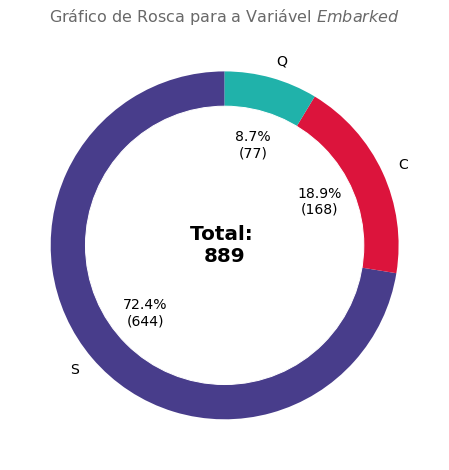

In [10]:
plot_donut_chart(df=df, col='Embarked')

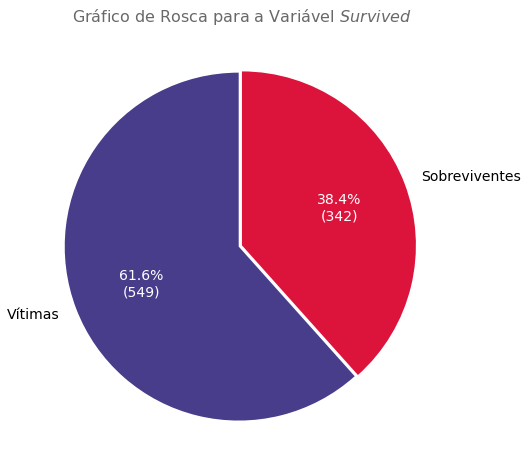

In [11]:
plot_pie_chart(df=df, col='Survived', label_names=['Vítimas', 'Sobreviventes'], explode=(0.02, 0),
               shadow=False)

/home/paninit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


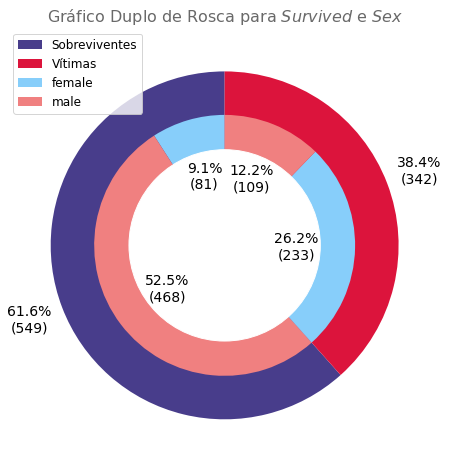

In [12]:
from matplotlib.lines import Line2D
plot_double_donut_chart(df=df, col1='Survived', col2='Sex', label_names_col1=['Sobreviventes', 'Vítimas'])

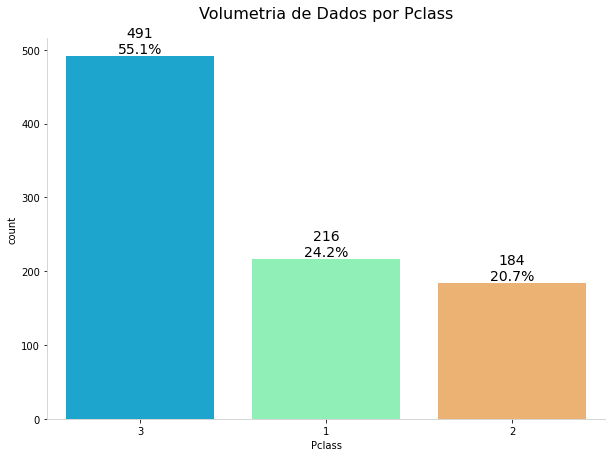

In [13]:
plot_countplot(df=df, col='Pclass', order=True)